# Imports

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# Leitura dos Dados 

In [7]:
df = pd.read_csv('/home/cid34senhas/Desktop/DAATP/RawData/train_radiomics_hipocamp.csv') 
df_test = pd.read_csv('/home/cid34senhas/Desktop/DAATP/RawData/test_radiomics_hipocamp.csv')
x_train = df.drop(columns=['Transition'])


# Analise dos Dados

## Null Values

In [8]:
#heat = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
nullsum = df.isnull().sum()
for nullsum1 in  nullsum:
    total = 0 
    total += nullsum1
print("Total:", total)

#O DATASET NÂO APRESENTA NULL VALUES    

Total: 0


## Valores Duplicados 

In [9]:
total_duplicates = df.duplicated().sum()
    
# Exibe o total de duplicados
print(f"Total de linhas duplicadas: {total_duplicates}")

# Não há duplicados 

Total de linhas duplicadas: 0


## Missing Values 

In [10]:
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])
print(f"Toal de valores duplicados: {missing_data}")

# Não há missing Values

Series([], dtype: int64)
Toal de valores duplicados: ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Transition                          0
Length: 2181, dtype: int64


## Análise do Target

<Axes: xlabel='Transition'>

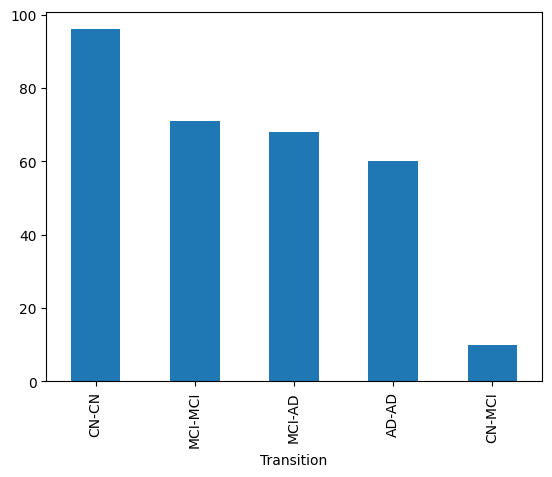

In [11]:
df['Transition'].value_counts().plot(kind='bar')

## Skewness

In [12]:
def calculate_skewness(df):
    skew = df.skew()
    skew_pos = skew[skew > 1]
    skew_neg = skew[skew < -1]
    skew_zero = skew[(skew >= -1) & (skew <= 1)]
    print(f"Positive skewness: {len(skew_pos)}")
    print(f"Negative skewness: {len(skew_neg)}")
    print(f"Zero skewness: {len(skew_zero)}")
    return skew_pos, skew_neg, skew_zero

numerical_df = x_train.select_dtypes(include=['number'])
skew_pos, skew_neg, skew_zero = calculate_skewness(numerical_df)

Positive skewness: 538
Negative skewness: 109
Zero skewness: 1514


## Kurtosis

In [13]:
def calculate_kurtosis(df):
    kurt = df.kurtosis()
    kurt_pos = kurt[kurt > 1]
    kurt_neg = kurt[kurt < -1]
    kurt_zero = kurt[(kurt >= -1) & (kurt <= 1)]
    print(f"Positive kurtosis: {len(kurt_pos)}")
    print(f"Negative kurtosis: {len(kurt_neg)}")
    print(f"Zero kurtosis: {len(kurt_zero)}")
    return kurt_pos, kurt_neg, kurt_zero

numerical_df = x_train.select_dtypes(include=['number'])

kurt_pos, kurt_neg, kurt_zero = calculate_kurtosis(numerical_df)

Positive kurtosis: 806
Negative kurtosis: 79
Zero kurtosis: 1276
